In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256)


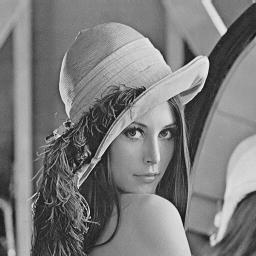

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

# 소벨 에지 검출기 구현

In [ ]:
#소벨 에지 검출기 구현

gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int)
gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = int)

In [ ]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

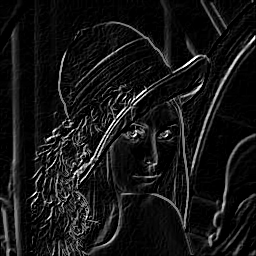

In [ ]:
cv2_imshow(outImg)  #출력물: 고주파 영상

In [ ]:
#이진화

gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

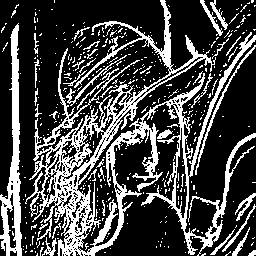

In [ ]:
threshold = 20
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if (outImg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

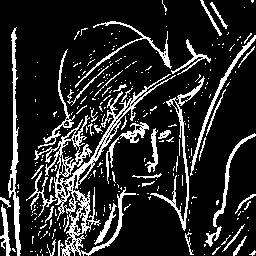

In [ ]:
threshold = 40
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if (outImg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

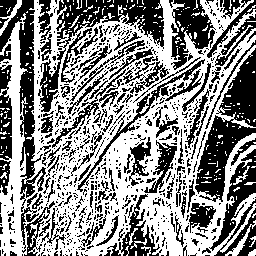

In [ ]:
threshold = 5
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if (outImg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

# 캐니 에지 검출기 구현

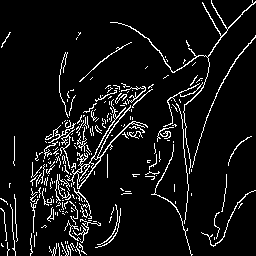

In [ ]:
cannyImg = cv2.Canny(gImg, 200, 250)
cv2_imshow(cannyImg)

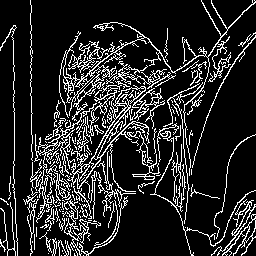

In [ ]:
cannyImg = cv2.Canny(gImg, 20, 200)
cv2_imshow(cannyImg)

In [ ]:
blurImg = cv2.GaussianBlur(gImg, (5, 5), 1.4)

In [ ]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

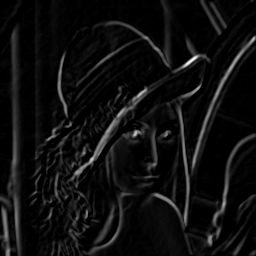

In [ ]:
cv2_imshow(cannyOutImg)

In [ ]:
#방향 계산

cannyDirection = np.arctan2(y, x)